In [77]:
## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()
sns.set()


import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import os
import random
import pickle
import torchvision

C:\Users\przek\AppData\Local\Temp\ipykernel_37132\4220142506.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [78]:
torch.cuda.set_device(0)
device = torch.device("cuda")

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_all_seeds(42)

# Read data

In [79]:
trainset = datasets.ImageFolder("trafic_32/")

In [80]:
from tqdm import tqdm
def check_classes_amounts(set_with_labels):
    counter = [1,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0,0,0,0,0,0,0,0,
               0,0,0]
    count = 0
    for j in tqdm(range(len(trainset)-1)):
        if set_with_labels[j][1] == set_with_labels[j+1][1]:
            counter[count] = counter[count] + 1
        else:
            count += 1
            counter[count] = counter[count] + 1

    return counter

In [81]:
check_classes_amounts(trainset)

100%|██████████| 39208/39208 [00:23<00:00, 1636.31it/s]


[210,
 2220,
 2250,
 1410,
 1980,
 1860,
 420,
 1440,
 1410,
 1470,
 2010,
 1320,
 2100,
 2160,
 780,
 630,
 420,
 1110,
 1200,
 210,
 360,
 330,
 390,
 510,
 270,
 1500,
 600,
 240,
 540,
 270,
 450,
 780,
 240,
 689,
 420,
 1200,
 390,
 210,
 2070,
 300,
 360,
 240,
 240]

In [82]:
print(len(trainset))

39209


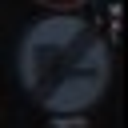

In [85]:
from IPython.display import display

image_num = -1
scale = 4
display(trainset[image_num][0].resize(( int(trainset[image_num][0].width * scale), int(trainset[image_num][0].height * scale))))